# Exploratory Data Analysis - FakeNews.Br

Esse notebook visa explorar os dados coletados para o projeto FakeNews.Br.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados

In [2]:
# Read the parquet file
df = pd.read_parquet('../data/processed/fakebr_news.parquet')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (7200, 31)

Columns: ['id', 'full_text', 'preprocessed_text', 'size_normalized_text', 'author', 'link', 'category', 'publication_date', 'is_fake', 'text_hash', 'created_at', 'updated_at', 'num_tokens', 'num_palavras_sem_pontuacao', 'num_tipos', 'num_links_internos', 'num_palavras_maiuscula', 'num_verbos', 'num_nomes', 'num_adjetivos', 'num_adverbios', 'num_pronomes', 'num_caracteres', 'avg_sent_length', 'avg_word_length', 'pausality', 'emotiveness', 'diversity', 'percentage_spelling_errors', 'publication_date_as_date', 'sequence']


## Visão Geral dos Dados

In [3]:
# Display first few rows
df.head()


,id,full_text,preprocessed_text,size_normalized_text,author,link,category,publication_date,is_fake,text_hash,...,num_pronomes,num_caracteres,avg_sent_length,avg_word_length,pausality,emotiveness,diversity,percentage_spelling_errors,publication_date_as_date,sequence
0,50323,Temer resolve o problema de Luislinda: liberd...,"temer resolve problema luislinda: liberdade, a...",None,None,https://ceticismopolitico.com/2017/11/27/temer...,politica,2017-11-27,True,2b71d28df821b78ab7e5f51dc261d96a6ed50c9ac29767...,...,12,654,12.09,4.92,2.6364,0.3036,0.7218,0.0,2017-11-27,5
1,50324,Moro está certo ao não se arrepender de divulg...,moro certo nao arrepender divulgacao audios lu...,None,None,https://ceticismopolitico.com/2017/11/27/moro-...,politica,2017-11-27,True,20cfef902ae628d6beea93440f2401db546589d0651a11...,...,23,892,13.79,4.62,2.1429,0.2530,0.6684,0.0,2017-11-27,6
2,50325,MP pede proibição de filmagens no MAM e acaba ...,mp pede proibicao filmagens mam acaba pratican...,None,None,https://ceticismopolitico.com/2017/11/27/mp-pe...,sociedade_cotidiano,2017-11-27,True,3de991e2e918d339ecf4802ad85a861c1a5346013bfc07...,...,14,963,15.54,4.77,1.6923,0.1290,0.6634,0.0,2017-11-27,7
3,50326,Hoje completou um ano da morte de um dos psico...,hoje completou ano morte psicopatas repulsivos...,None,None,https://ceticismopolitico.com/2017/11/25/hoje-...,politica,2017-11-25,True,16ce65c968ea7835fa7dea147abde398a0b082abb09caa...,...,10,797,11.50,4.33,2.0625,0.4571,0.6793,0.0,2017-11-25,8
4,50319,Kátia Abreu diz que vai colocar sua expulsão e...,"katia abreu diz vai colocar expulsao moldura, ...",None,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,True,9ad83223fd4c6f087c148c5a8c079ec3082b05fc8fd79d...,...,26,815,14.23,4.41,2.0000,0.2632,0.6486,0.0,2017-11-30,1


In [4]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          7200 non-null   int64         
 1   full_text                   7200 non-null   object        
 2   preprocessed_text           7200 non-null   object        
 3   size_normalized_text        0 non-null      object        
 4   author                      7200 non-null   object        
 5   link                        7200 non-null   object        
 6   category                    7200 non-null   object        
 7   publication_date            7200 non-null   object        
 8   is_fake                     7200 non-null   bool          
 9   text_hash                   7200 non-null   object        
 10  created_at                  7200 non-null   datetime64[ns]
 11  updated_at                  7200 non-null   datetime64[n

In [5]:
# Statistical summary
df.describe()

,id,created_at,updated_at,num_tokens,num_palavras_sem_pontuacao,num_tipos,num_links_internos,num_palavras_maiuscula,num_verbos,num_nomes,...,num_pronomes,num_caracteres,avg_sent_length,avg_word_length,pausality,emotiveness,diversity,percentage_spelling_errors,publication_date_as_date,sequence
count,7200.000000,7200,7200,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.00000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200,7200.000000
mean,53918.500000,2026-01-20 15:43:33.129734400,2026-01-20 15:43:33.129734400,742.763333,646.172222,306.896250,0.173472,7.680694,100.76750,182.920278,...,38.758056,3138.628333,18.229231,4.845142,2.755725,0.209758,0.577904,0.002646,2016-07-12 06:20:40.858333,1801.900556
min,50319.000000,2026-01-20 15:43:30.789305,2026-01-20 15:43:30.789305,11.000000,9.000000,9.000000,0.000000,0.000000,1.00000,3.000000,...,0.000000,34.000000,2.670000,3.620000,0.250000,0.000000,0.232200,0.000000,0201-01-06 00:00:00,1.000000
25%,52118.750000,2026-01-20 15:43:31.848361728,2026-01-20 15:43:31.848361728,183.000000,157.000000,106.000000,0.000000,2.000000,26.00000,46.000000,...,8.000000,755.000000,14.377500,4.700000,2.166700,0.162500,0.471100,0.000000,2016-10-21 00:00:00,901.750000
50%,53918.500000,2026-01-20 15:43:32.889461504,2026-01-20 15:43:32.889461504,416.000000,362.000000,208.000000,0.000000,5.000000,57.00000,106.000000,...,19.000000,1756.500000,18.115000,4.850000,2.684000,0.204100,0.577400,0.000000,2017-06-03 00:00:30,1802.500000
75%,55718.250000,2026-01-20 15:43:34.435871488,2026-01-20 15:43:34.435871488,1064.250000,928.250000,440.000000,0.000000,10.000000,141.00000,265.000000,...,49.000000,4523.000000,21.820000,4.990000,3.224975,0.251025,0.676300,0.000000,2017-11-20 14:02:00,2702.250000
max,57518.000000,2026-01-20 15:43:35.916620,2026-01-20 15:43:35.916620,8634.000000,7588.000000,2805.000000,11.000000,233.000000,1148.00000,2170.000000,...,720.000000,37381.000000,110.250000,5.940000,51.238100,0.750000,1.000000,0.380000,2018-07-23 00:00:00,3602.000000
std,2078.605302,NaN,NaN,774.155454,674.901525,260.201075,0.549322,9.860613,108.03151,186.507322,...,51.759915,3283.090323,6.090225,0.246275,1.154138,0.070239,0.126475,0.008115,NaN,1039.989113


## Missing Values Analysis

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Percentage
size_normalized_text,7200,100.0


## Class Distribution

Class Distribution:
is_fake
True     3600
False    3600
Name: count, dtype: int64


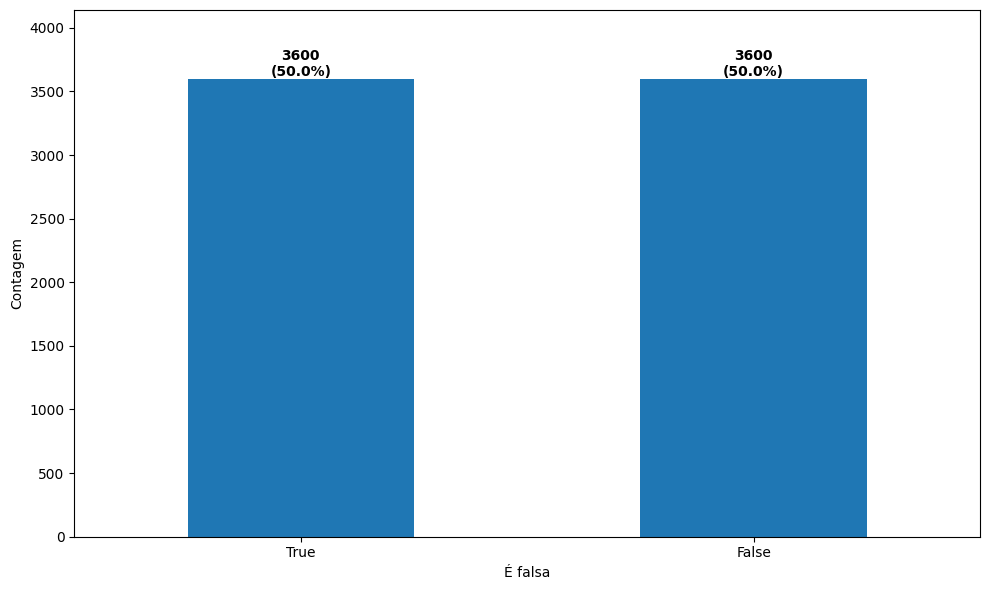

In [ ]:
if 'is_fake' in df.columns:
    print("Class Distribution:")
    counts = df['is_fake'].value_counts()
    print(counts)
    
    plt.figure(figsize=(10, 6))
    # plt.title('Distribuição de Notícias Falsas vs Verdadeiras')
    ax = counts.plot(kind='bar', color='skyblue') 
    
    plt.xlabel('É falsa')
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)
    
    # 1. Ajuste do limite do eixo Y para o texto não bater no teto
    plt.ylim(0, counts.max() * 1.15) 
    
    total = counts.sum()
    for i, count in enumerate(counts):
        percentage = (count / total) * 100
        ax.text(i, count, f'{count}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 2. Garante que tudo caiba na moldura final
    plt.tight_layout()
    plt.show()

## Category Analysis

Category Distribution:
category
politica               4180
tv_celebridades        1544
sociedade_cotidiano    1276
ciencia_tecnologia      112
religiao                 44
economia                 44
Name: count, dtype: int64


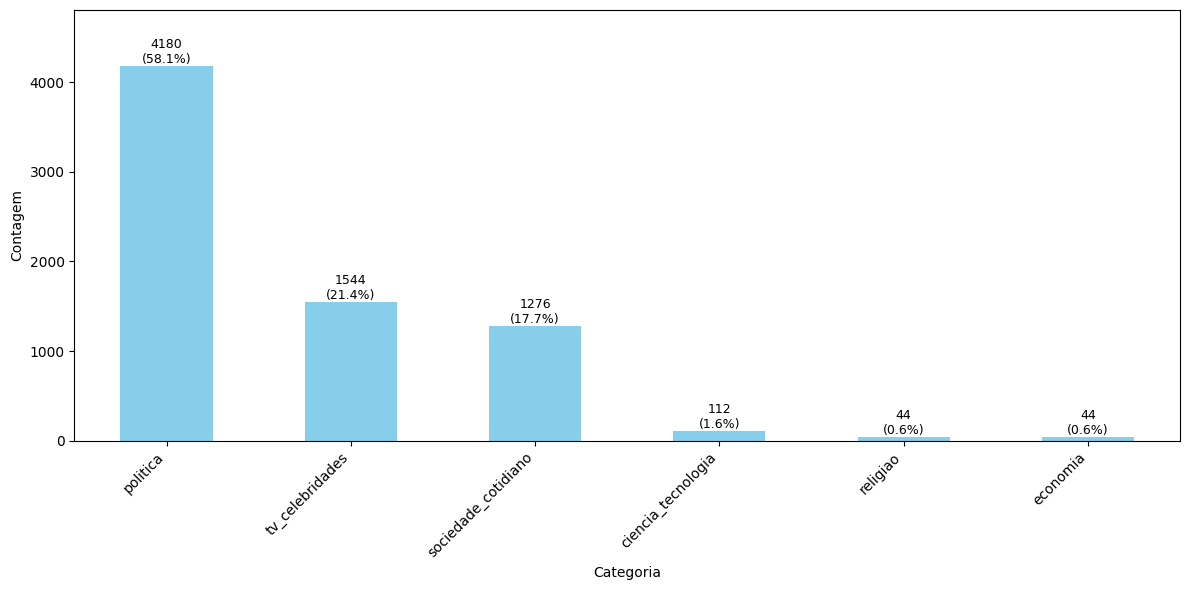

In [20]:
# Check if 'category' column exists
if 'category' in df.columns:
    print("Category Distribution:")
    category_counts = df['category'].value_counts()
    print(category_counts)
    
    # Visualize category distribution
    plt.figure(figsize=(12, 6))
    
    # Definimos uma cor única (ex: 'skyblue') para todas as colunas
    ax = category_counts.plot(kind='bar', color='skyblue') 
    
    # plt.title('Distribuição de Notícias por Categoria') # Título mantido comentado
    plt.xlabel('Categoria')
    plt.ylabel('Contagem')
    
    # Rotação para categorias longas não se sobreporem
    plt.xticks(rotation=45, ha='right')
    
    # AJUSTE PARA NÃO CORTAR: Aumentamos o topo do gráfico em 15% 
    # para dar espaço aos rótulos de texto
    plt.ylim(0, category_counts.max() * 1.15)
    
    # Add value and percentage labels on each bar
    total = category_counts.sum()
    for i, count in enumerate(category_counts):
        percentage = (count / total) * 100
        ax.text(i, count, f'{count}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9)
    
    # Ajusta as margens para que as legendas de baixo (e de cima) caibam na imagem
    plt.tight_layout()
    plt.show()

## Temporal Analysis

Distribution by Year:
year
201        3
2009       3
2010       6
2011       5
2012      10
2013       5
2014      10
2015     275
2016    1864
2017    3711
2018    1308
Name: count, dtype: int64


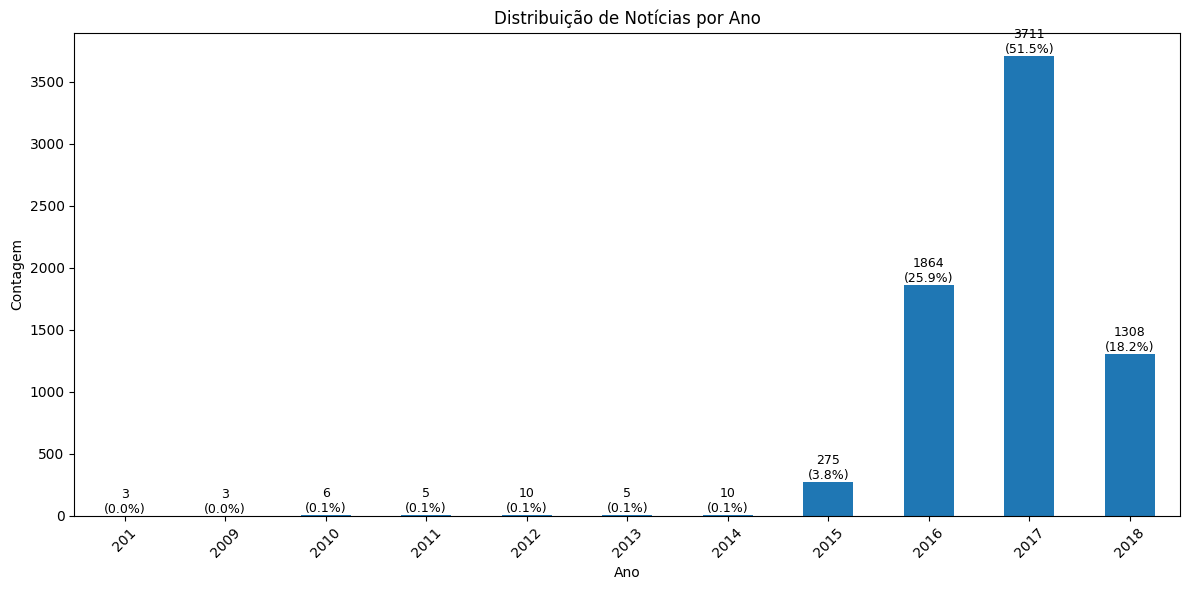

In [ ]:
# Check if 'publication_date' column exists
if 'publication_date_as_date' in df.columns:
    # Convert to datetime if not already
    df['publication_date_as_date'] = pd.to_datetime(df['publication_date_as_date'])
    
    # Extract year and month
    df['year'] = df['publication_date_as_date'].dt.year
    df['month'] = df['publication_date_as_date'].dt.month
    
    # Distribution by year
    print("Distribution by Year:")
    year_counts = df['year'].value_counts().sort_index()
    print(year_counts)
    
    # Visualize temporal distribution
    plt.figure(figsize=(12, 6))
    ax = year_counts.plot(kind='bar')
    # plt.title('Distribuição de Notícias por Ano')
    plt.xlabel('Ano')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    
    # Add value and percentage labels on each bar
    total = year_counts.sum()
    for i, (year, count) in enumerate(year_counts.items()):
        percentage = (count / total) * 100
        ax.text(i, count, f'{count}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()